In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt

df = pd.read_excel(r"/content/irctc.xlsx")
print(df)

             Date Month  Day    Price     Open     High      Low   Volume  \
0    Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1    Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2    Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3    Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4    Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   
..            ...   ...  ...      ...      ...      ...      ...      ...   
244  Jul 07, 2020   Jul  Tue  1397.40  1410.00  1411.00  1390.05  480.21K   
245  Jul 06, 2020   Jul  Mon  1400.75  1405.50  1415.50  1394.00  614.93K   
246  Jul 03, 2020   Jul  Fri  1405.10  1415.00  1425.00  1398.00  599.49K   
247  Jul 02, 2020   Jul  Thu  1412.35  1440.00  1467.80  1395.30    2.16M   
248  Jul 01, 2020   Jul  Wed  1363.05  1363.65  1377.00  1356.00  383.00K   

       Chg%  
0    0.0020  
1    0.0043  
2   -0.0020  
3   -0.0026  
4   -

In [2]:
#question 2: to find mean and variance of price column
mean = df["Price"].mean()

print('mean of the price',mean)
print()
print()
y = st.variance(df["Price"])
print('variance of the price',y)

mean of the price 1560.6634538152612


variance of the price 58732.365352539186


In [3]:
#selecting price data for all wednesdays
alldays = df[['Day','Price']]
wednesday = alldays[alldays.Day == 'Wed']
wednesday.reset_index(inplace = True)
print(wednesday)

    index  Day    Price
0       4  Wed  2078.25
1       9  Wed  2089.95
2      14  Wed  2071.20
3      19  Wed  1917.95
4      24  Wed  1894.05
5      29  Wed  1858.10
6      33  Wed  1746.60
7      38  Wed  1723.65
8      43  Wed  1795.85
9      56  Wed  1709.00
10     60  Wed  1757.00
11     64  Wed  1760.55
12     69  Wed  1824.00
13     73  Wed  2018.50
14     78  Wed  1886.10
15     83  Wed  1675.45
16     88  Wed  1698.65
17     93  Wed  1618.40
18     98  Wed  1469.35
19    103  Wed  1438.25
20    107  Wed  1452.70
21    112  Wed  1461.15
22    117  Wed  1483.45
23    122  Wed  1434.95
24    126  Wed  1411.55
25    131  Wed  1423.40
26    136  Wed  1617.75
27    141  Wed  1349.90
28    145  Wed  1353.90
29    150  Wed  1365.30
30    154  Wed  1371.25
31    159  Wed  1300.55
32    164  Wed  1333.35
33    169  Wed  1331.75
34    174  Wed  1338.05
35    179  Wed  1356.90
36    183  Wed  1384.00
37    188  Wed  1372.85
38    193  Wed  1367.40
39    198  Wed  1348.90
40    203  Wed  

In [6]:
wednesdaymean = st.mean(wednesday['Price'])
print('mean price of all wednasday_s',wednesdaymean)
print()
alldaysmean = st.mean(alldays['Price'])
print('Mean price of all the days',alldaysmean)

mean price of all wednasday_s 1550.706

Mean price of all the days 1560.663453815261


In [7]:
#mean for the month of april
allmonths = df[['Month','Price']]
aprilmean = allmonths[allmonths.Month == 'Apr']

print('mean of month of april', st.mean(aprilmean['Price']))

print('mean of all the months of the year', st.mean(allmonths['Price']))

print(allmonths)
print(aprilmean)

mean of month of april 1698.9526315789474
mean of all the months of the year 1560.663453815261
    Month    Price
0     Jun  2081.85
1     Jun  2077.75
2     Jun  2068.85
3     Jun  2072.95
4     Jun  2078.25
..    ...      ...
244   Jul  1397.40
245   Jul  1400.75
246   Jul  1405.10
247   Jul  1412.35
248   Jul  1363.05

[249 rows x 2 columns]
   Month    Price
41   Apr  1791.40
42   Apr  1792.55
43   Apr  1795.85
44   Apr  1793.20
45   Apr  1730.85
46   Apr  1712.00
47   Apr  1673.05
48   Apr  1640.05
49   Apr  1612.70
50   Apr  1627.45
51   Apr  1608.10
52   Apr  1611.65
53   Apr  1582.00
54   Apr  1730.90
55   Apr  1726.40
56   Apr  1709.00
57   Apr  1688.55
58   Apr  1702.65
59   Apr  1751.75


In [8]:
#From the Chg% (available in column I) find the probability of making a loss over the stock. (Suggestion: use lambda function to find negative values)

chgmean = st.mean(df['Chg%'])
print(chgmean)

chgstd = st.pstdev(df['Chg%'])
print(chgstd)

0.00196425702811245
0.022442654444254532


In [9]:
#calculating probability of making a profit on wednesdays
D = (df['Chg%'] < 0)
NEG = df.loc[D]
#print(NEG)
neg_sum = NEG['Chg%'].sum()
print('sum of all negative in chg%',neg_sum)
print()
D1 = (df['Chg%'] > 0)
POS = df.loc[D1]
pos_sum = POS['Chg%'].sum()
print('sum of all positive in chg%',pos_sum)
print()
x = neg_sum % pos_sum
print(x)
print()
prb = (x/pos_sum) * 100
print('probability of loss over the stock',prb)

sum of all negative in chg% -1.4492

sum of all positive in chg% 1.9383000000000001

0.4891000000000001

probability of loss over the stock 25.233451994015375


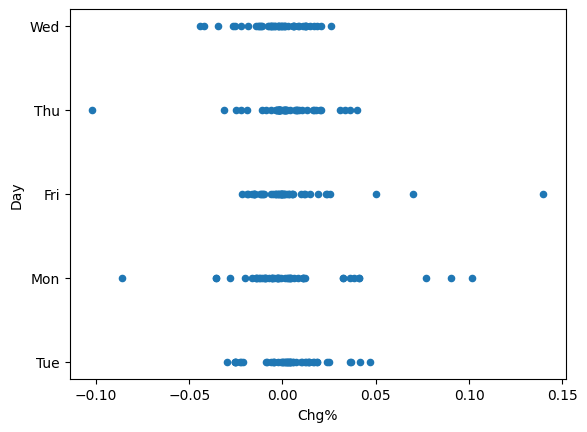

In [10]:
T = df.plot.scatter(x='Chg%',
                    y='Day')